In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [2]:
csv_test = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/STRAWBERRY_FRUIT_SETTING_ENV_20221209.csv")


In [3]:
csv_test

,ZONE_NM,STRG_DT,FRST_TREE_CNT,RTTN_PUMP_OPRT_YN_4,RTTN_PUMP_OPRT_YN_3,RTTN_PUMP_OPRT_YN_2,RTTN_PUMP_OPRT_YN_1,CLR_OPRT_YN_5,CLR_OPRT_YN_4,CLR_OPRT_YN_3,...,SKLT_OPDR_RATE_1_LEFT,FMGEQ_OPRT_YN,INNER_HMDT_9,INNER_HMDT_8,INNER_HMDT_7,INNER_HMDT_6,INNER_TPRT_9,INNER_TPRT_8,INNER_TPRT_7,INNER_TPRT_6
0,66,2022/01/01 0:00,5.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,2022/01/01 0:10,5.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,66,2022/01/01 0:20,5.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,66,2022/01/01 0:30,5.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,66,2022/01/01 0:40,5.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,66,2022/06/30 23:10,0.5,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26059,66,2022/06/30 23:20,0.5,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26060,66,2022/06/30 23:30,0.5,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26061,66,2022/06/30 23:40,0.5,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 연속형 변수 다 선택 (결측치 처리 시트에 있는 )

In [4]:
# csv_test_jin= csv_test[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","WNDRC","ABSLT_HMDT","WDSP"
,"STRTN_WATER","EXTN_SRQT","WATER_LACK_VL","EXTN_ACCMLT_QOFLG","SPL_TPRT_1","HTNG_TPRT_1","VNTILAT_TPRT_5"
,"VNTILAT_TPRT_4","VNTILAT_TPRT_3","TRWVLV_OPDR_RATE_2","TRWVLV_OPDR_RATE_1","HRZNT_SCRN_OPDR_RATE_2"
,"HRZNT_SCRN_OPDR_RATE_1","VNTILAT_TPRT_1","SPL_TPRT_2","INNER_TPRT_1","INNER_TPRT_2","AVE_INNER_TPRT_1_2","INNER_HMDT_1",
"INNER_HMDT_2","AVE_INNER_HMDT_1_2","CBDX_STNG_VL","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT"]]

In [5]:
# csv_test_jin (연속형변수들만 )

,PFBS_NTRO_CBDX_CTRN,EXTN_TPRT,DWP_TPRT,WNDRC,ABSLT_HMDT,WDSP,STRTN_WATER,EXTN_SRQT,WATER_LACK_VL,EXTN_ACCMLT_QOFLG,...,SPL_TPRT_2,INNER_TPRT_1,INNER_TPRT_2,AVE_INNER_TPRT_1_2,INNER_HMDT_1,INNER_HMDT_2,AVE_INNER_HMDT_1_2,CBDX_STNG_VL,SKLT_OPDR_RATE_1_RIGHT,SKLT_OPDR_RATE_1_LEFT
0,456,-2.2,8.5,193,8.3,2.6,9.2,0,0.9,962,...,10.0,10.0,7.8,8.9,90.4,93.5,92.0,550.0,0,0
1,459,-2.2,9.0,205,8.6,3.0,9.4,0,0.8,962,...,10.3,10.3,8.0,9.2,91.7,92.3,92.0,550.0,0,0
2,468,-2.2,9.1,198,8.6,3.0,9.5,0,0.9,962,...,10.5,10.6,8.4,9.5,90.6,89.8,90.2,550.0,0,0
3,466,-2.3,9.2,213,8.7,2.6,9.4,0,0.7,962,...,10.4,10.4,8.5,9.5,92.9,89.9,91.4,550.0,0,0
4,467,-2.3,9.2,193,8.7,3.3,9.3,0,0.6,962,...,10.1,10.2,8.0,9.1,94.0,96.1,95.1,550.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,421,25.3,24.3,353,22.8,0.0,24.8,0,2.0,2140,...,29.6,25.7,25.7,25.7,92.2,89.9,91.1,0.0,40,0
26059,421,25.1,24.2,353,22.7,0.0,24.6,0,1.9,2140,...,29.6,25.6,25.6,25.6,92.2,90.7,91.5,0.0,40,0
26060,423,24.9,24.1,352,22.5,0.0,24.5,0,2.0,2140,...,29.6,25.5,25.4,25.5,92.2,91.4,91.8,0.0,40,0
26061,427,24.6,24.0,353,22.5,0.0,24.2,0,1.7,2140,...,29.6,25.3,25.4,25.4,92.9,91.4,92.2,0.0,40,0


In [ ]:
#챗 GPT 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

# CSV 파일 불러오기
data = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/STRAWBERRY_FRUIT_SETTING_ENV_20221209.csv")

# 데이터에서 설명 변수(X)와 결과 변수(y) 추출
X = csv_test[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","WNDRC","ABSLT_HMDT","WDSP"
,"STRTN_WATER","EXTN_SRQT","WATER_LACK_VL","EXTN_ACCMLT_QOFLG","SPL_TPRT_1","HTNG_TPRT_1","VNTILAT_TPRT_5"
,"VNTILAT_TPRT_4","VNTILAT_TPRT_3","TRWVLV_OPDR_RATE_2","TRWVLV_OPDR_RATE_1","HRZNT_SCRN_OPDR_RATE_2"
,"HRZNT_SCRN_OPDR_RATE_1","VNTILAT_TPRT_1","SPL_TPRT_2","INNER_TPRT_1","INNER_TPRT_2","AVE_INNER_TPRT_1_2","INNER_HMDT_1",
"INNER_HMDT_2","AVE_INNER_HMDT_1_2","CBDX_STNG_VL","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT"]]  # 세 번째 열부터 끝까지가 설명 변수
y= csv_test[["FRST_TREE_CNT"]]  # 두 번째 열이 결과 변수

# 데이터를 train set과 test set으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델을 초기화
model = RandomForestRegressor()

# 모델을 사용해 피쳐를 선택
sfm = SelectFromModel(estimator=model, threshold="median")
X_train_transformed = sfm.fit_transform(X_train, y_train)
X_test_transformed = sfm.transform(X_test)  # test set을 변환

# 모델을 선택된 피쳐를 사용하여 학습
model.fit(X_train_transformed, y_train)

# 테스트 세트에서 모델 평가
y_pred = model.predict(X_test_transformed)

# 회귀 모델의 성능 평가 (MSE 사용)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_selection\_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\user\AppData\Local\Temp\ipykernel_7904\2396517444.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_transformed, y_train)


Mean Squared Error: 0.05281499406531747


In [9]:
column_names= ["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","WNDRC","ABSLT_HMDT","WDSP"
,"STRTN_WATER","EXTN_SRQT","WATER_LACK_VL","EXTN_ACCMLT_QOFLG","SPL_TPRT_1","HTNG_TPRT_1","VNTILAT_TPRT_5"
,"VNTILAT_TPRT_4","VNTILAT_TPRT_3","TRWVLV_OPDR_RATE_2","TRWVLV_OPDR_RATE_1","HRZNT_SCRN_OPDR_RATE_2"
,"HRZNT_SCRN_OPDR_RATE_1","VNTILAT_TPRT_1","SPL_TPRT_2","INNER_TPRT_1","INNER_TPRT_2","AVE_INNER_TPRT_1_2","INNER_HMDT_1",
"INNER_HMDT_2","AVE_INNER_HMDT_1_2","CBDX_STNG_VL","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT"] 

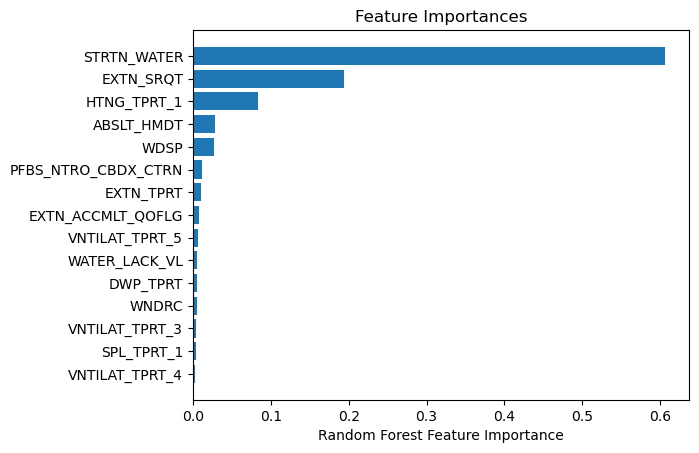

In [12]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [column_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

## 연속형 변수 일부만 ( 전처리 파일 아래에 있는)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

# CSV 파일 불러오기
data = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/STRAWBERRY_FRUIT_SETTING_ENV_20221209.csv")

# 데이터에서 설명 변수(X)와 결과 변수(y) 추출
X = csv_test[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","ABSLT_HMDT","STRTN_WATER","WATER_LACK_VL","SPL_TPRT_1","HTNG_TPRT_1","CBDX_GNRT_OPRT_YN","SPL_TPRT_2","AVE_INNER_TPRT_1_2","AVE_INNER_HMDT_1_2","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT"]]  # 세 번째 열부터 끝까지가 설명 변수
y= csv_test[["FRST_TREE_CNT"]]  # 두 번째 열이 결과 변수

#CBDX_STNG_VL 넣음 ,"CBDX_GNRT_OPRT_YN"대신 (d이케 안함 )

# 데이터를 train set과 test set으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델을 초기화
model = RandomForestRegressor()

# 모델을 사용해 피쳐를 선택
sfm = SelectFromModel(estimator=model, threshold="median")
X_train_transformed = sfm.fit_transform(X_train, y_train)
X_test_transformed = sfm.transform(X_test)  # test set을 변환

# 모델을 선택된 피쳐를 사용하여 학습
model.fit(X_train_transformed, y_train)

# 테스트 세트에서 모델 평가
y_pred = model.predict(X_test_transformed)

# 회귀 모델의 성능 평가 (MSE 사용)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_selection\_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\user\AppData\Local\Temp\ipykernel_7904\3633851929.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_transformed, y_train)


Mean Squared Error: 0.1803896008176674


In [15]:
column_names_part=["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","ABSLT_HMDT","STRTN_WATER","WATER_LACK_VL","SPL_TPRT_1","HTNG_TPRT_1","CBDX_GNRT_OPRT_YN","SPL_TPRT_2","AVE_INNER_TPRT_1_2","AVE_INNER_HMDT_1_2","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT"]  # 세 번째 열부터 끝까지가 설명 변수

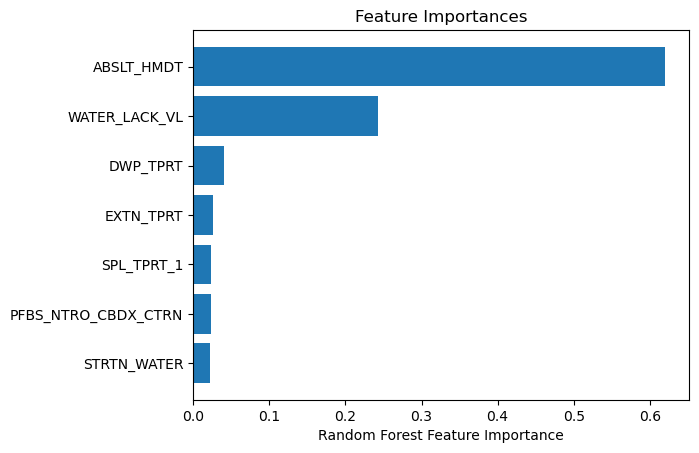

In [16]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [column_names_part[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()